# Land uUse/Land Cover (LULC) classification with Deep Learning

This a mini-project to classify 9 Land use classes using transfer learning in Convolutional Neural Networks (CNN). The  Dataset used in this project is published with the original paper tittled: __EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification__. 





In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [259]:
from fastai import *

import pathlib
import rasterio
from rasterio import plot
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [260]:
PATH = pathlib.Path('train')
train_path = PATH
classes = list(train_path.iterdir())
classes

[WindowsPath('train/AnnualCrop'),
 WindowsPath('train/Forest'),
 WindowsPath('train/HerbaceousVegetation'),
 WindowsPath('train/Highway'),
 WindowsPath('train/Industrial'),
 WindowsPath('train/Pasture'),
 WindowsPath('train/PermanentCrop'),
 WindowsPath('train/Residential'),
 WindowsPath('train/River'),
 WindowsPath('train/SeaLake')]

## Visualization

#### Classes and Size

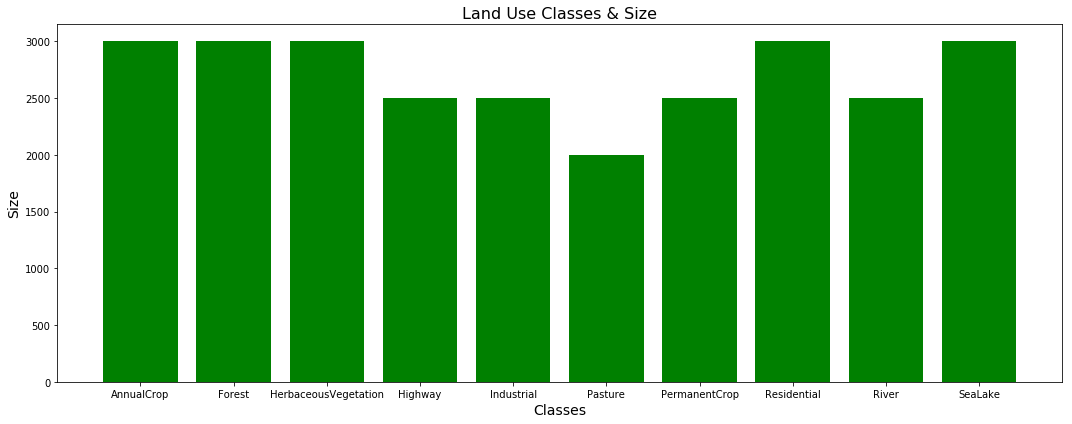

In [261]:
files = []
for i in range(len(classes)):
    paths = classes[i]
    files.append(classes[i])
#print(files)
classes_num = {}
for i in range(len(classes)):
    #print(classes[i])
    folders = classes[i]
    name = str(classes[i])[6:]
    classes_num[name] = len([f for f in os.listdir(folders)])
    #print(f'{i} class has {len(list(folders.iterdir))}')

#dataset = rasterio.open('train/AnnualCrop/AnnualCrop_1.tif')
#print(dataset)
#print(files[0])
print()

plt.figure(figsize=(15,6))
plt.bar(classes_num.keys(), classes_num.values(), color='green')
plt.title('Land Use Classes & Size', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.tight_layout()
plt.savefig('classes.jpg')


#### Images

C:\Users\bubbl\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:345: UserWarning: tight_layout not applied: number of columns in subplot specifications mustbe multiples of one another.
  warnings.warn('tight_layout not applied: '


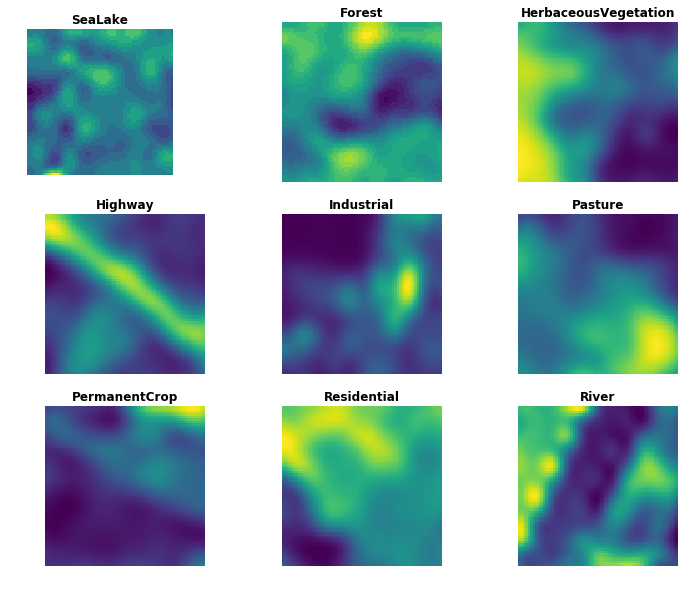

In [291]:
fig = plt.figure(figsize=(12,10))

src0=rasterio.open(str(classes[0])+'/'+str(classes[0])[6:]+'_1.tif')
src1=rasterio.open(str(classes[1])+'/'+str(classes[1])[6:]+'_1.tif')
src2=rasterio.open(str(classes[2])+'/'+str(classes[2])[6:]+'_1.tif')
src3=rasterio.open(str(classes[3])+'/'+str(classes[3])[6:]+'_1.tif')
src4=rasterio.open(str(classes[4])+'/'+str(classes[4])[6:]+'_1.tif')
src5=rasterio.open(str(classes[5])+'/'+str(classes[5])[6:]+'_1.tif')
src6=rasterio.open(str(classes[6])+'/'+str(classes[6])[6:]+'_1.tif')
src7=rasterio.open(str(classes[7])+'/'+str(classes[7])[6:]+'_1.tif')
src8=rasterio.open(str(classes[8])+'/'+str(classes[8])[6:]+'_1.tif')
src9=rasterio.open(str(classes[9])+'/'+str(classes[9])[6:]+'_1.tif')


ax1 = plt.subplot(331);plt.axis('off');plot.show(src0.read(1), ax=ax1, title=str(classes[0])[6:])
ax2 = plt.subplot(332);plt.axis('off');plot.show(src1.read(1), ax=ax2, title=str(classes[1])[6:])
ax3 = plt.subplot(333);plt.axis('off');plot.show(src2.read(1), ax=ax3, title=str(classes[2])[6:])

ax1 = plt.subplot(334);plt.axis('off');plot.show(src3.read(1), ax=ax1, title=str(classes[3])[6:])
ax2 = plt.subplot(335);plt.axis('off');plot.show(src4.read(1), ax=ax2, title=str(classes[4])[6:])
ax3 = plt.subplot(336);plt.axis('off');plot.show(src5.read(1), ax=ax3, title=str(classes[5])[6:])

ax1 = plt.subplot(337);plt.axis('off');plot.show(src6.read(1), ax=ax1, title=str(classes[6])[6:])
ax2 = plt.subplot(338);plt.axis('off');plot.show(src7.read(1), ax=ax2, title=str(classes[7])[6:])
ax3 = plt.subplot(339);plt.axis('off');plot.show(src8.read(1), ax=ax3, title=str(classes[8])[6:])

ax1 = plt.subplot(341);plt.axis('off');plot.show(src9.read(1), ax=ax1, title=str(classes[9])[6:])

plt.tight_layout()

## Model

In [292]:
sz = 224
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

NameError: name 'resnet50' is not defined

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [ ]:
learn.fit(0.001, 2)

In [ ]:
lrf=learn.lr_find(start_lr=1e-5, end_lr=1e-1)

In [ ]:
learn.sched.plot_lr()

In [ ]:
learn.sched.plot()

In [ ]:
learn.fit(1e-5, 3, cycle_len=1)


In [ ]:
learn.fit(1e-5, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.precompute = False 
learn.fit(1e-5, 3, cycle_len=1, cycle_mult=2)

In [ ]:
lr = 1e-4
lrs = np.array([lr/12,lr/6,lr])
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2) 

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2) 

In [ ]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2) 

## Analyzing results & Visualization

In [ ]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [ ]:
log_preds = learn.predict()
preds = np.argmax(log_preds, axis=1)
preds

In [ ]:
data.val_ds.fnames[0]

### Invidual Predictions

In [ ]:
classes_dict = dict(enumerate(data.classes))
classes_dict

In [ ]:
fn = data.val_ds.fnames[0]
pic1 = rasterio.open(str(PATH/fn))
plt.axis('off')
plot.show(pic1)

In [ ]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)
ds = FilesIndexArrayDataset([fn], np.array([0]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
print(classes_dict[np.argmax(preds)] == 'AnnualCrop')
np.argmax(preds), classes_dict[np.argmax(preds)]

In [ ]:
data.val_ds.fnames[2900]

In [ ]:
fn = data.val_ds.fnames[2900]
pic2 = rasterio.open(str(PATH/fn))
plt.axis('off')
plot.show(pic2)

In [ ]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)
ds = FilesIndexArrayDataset([fn], np.array([2900]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
print(classes_dict[np.argmax(preds)] == 'Pasture')
np.argmax(preds), classes_dict[np.argmax(preds)]

### Confusion Matrix

In [ ]:
multi_preds = learn.predict()
preds = np.argmax(multi_preds, axis=1)
preds

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes, cmap='Reds',figsize=(12,6))
plt.tight_layout()